In [ ]:
import json

import pandas as pd

base_path_results: str = '/Users/nicolahorst/Documents/GitHub/clem-project_playpen/benchmark_results/clembench/final_models'

base_model_llama_8B: str = 'Unsloth-meta-llama-3.1-4bit-plain-t0.0--Unsloth-meta-llama-3.1-4bit-plain-t0.0'
final_model_llama_8B: str = 'llama3.1-8B-sft-e1-DFINAL_0.7K-steps-t0.0--llama3.1-8B-sft-e1-DFINAL_0.7K-steps-t0.0'
base_model_llama_70B: str = 'Unsloth-meta-llama-3.1-70B-bnb-4bit-t0.0--Unsloth-meta-llama-3.1-70B-bnb-4bit-t0.0'
final_model_llama_70B: str = 'llama3.1-70B-sft-e1-DFINAL_0.6K-steps-t0.0--llama3.1-70B-sft-e1-DFINAL_0.6K-steps-t0.0'
base_model_mistral: str = 'Unsloth-Mistral-Small-24B-Instruct-2501-t0.0--Unsloth-Mistral-Small-24B-Instruct-2501-t0.0'
final_model_mistral: str = 'Mistral-small-2501-DFINAL_0.6K-steps-t0.0--Mistral-small-2501-DFINAL_0.6K-steps-t0.0'

model_lookup = {
    base_model_llama_8B: final_model_llama_8B,
    base_model_mistral: final_model_mistral,
    base_model_llama_70B: final_model_llama_70B
}

model_file_to_baseline = {
    'llama_8B': base_model_llama_8B,
    'mistral': base_model_mistral,
    'llama_70B': base_model_llama_70B
}

std_cols: list = ['game', 'model', 'experiment', 'episode']
model_files: list[str] = ['llama_8B','mistral', 'llama_70B', ]

current_base_model = base_model_mistral
current_final_model = final_model_mistral
model_file = 'mistral'
current_game = "matchit_ascii"
raw_csv = "raw.csv"

column_naming: dict = {
    "taboo": "Request Count"
}

In [56]:
import math


def load_raw_csv(mode_file: str, base_model: str, final_model: str, game: str) -> pd.DataFrame:
    path: str = base_path_results + '/' + mode_file + '/' + raw_csv
    df = pd.read_csv(path)
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df.metric = df.metric.astype('string')
    df.value = df.value.astype('string')
    df = df[df['game'] == game]
    metrics_for_game_df = df[df.game == game]
    unique_metrics: list = list(metrics_for_game_df['metric'].unique())
    df_pivoted = group_raw_csv(df, base_model, final_model)

    return reduce_to_metrics_for_game(df_pivoted, unique_metrics)

def group_raw_csv(df: pd.DataFrame, bm, fm) -> pd.DataFrame:
    df_pivoted = df.pivot(index=['game', 'model', 'experiment', 'episode'],
                          columns='metric',
                          values='value')

    # Reset the index to make the index columns regular columns
    df_pivoted = df_pivoted.reset_index()
    return df_pivoted

def reduce_to_metrics_for_game(df: pd.DataFrame, columns_to_keep) -> pd.DataFrame:
    std_cols: list = ['game', 'model', 'experiment', 'episode']
    columns_to_keep = std_cols + columns_to_keep
    columns_to_drop = [ c for c in list(df.columns) if c not in columns_to_keep]
    return df.drop(columns=columns_to_drop, axis=1)

current_base_model = base_model_mistral
current_final_model = final_model_mistral
model_file = 'mistral'
current_game = "matchit_ascii"
raw_csv = "raw.csv"

metric_to_plot = 'Request Count'
all_data = []
all_std = []
games = ["imagegame", "wordle", "wordle_withclue", "taboo", ]
for game in games:
    plot_data = []
    std_data = []
    for model in model_file_to_baseline.keys():
        df =  load_raw_csv(model, model_file_to_baseline[model], model_lookup[model_file_to_baseline[model]], game)
        df_base = df[(df['model'] == model_file_to_baseline[model]) & (df['Aborted'] != 1)]
        df_final = df[(df['model'] == model_lookup[model_file_to_baseline[model]]) & (df['Aborted'] != 1)]

        for col in df_base.columns:
            if col not in ['game', 'model', 'experiment', 'episode']:
                df_base[col] = pd.to_numeric(df_base[col], errors='coerce')
                df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

        plot_data.append(df_base[metric_to_plot].mean())
        plot_data.append(df_final[metric_to_plot].mean())

        std_data.append(df_base[metric_to_plot].std())
        std_data.append(df_final[metric_to_plot].std())
    all_data.append(plot_data)
    all_std.append(std_data)


/var/folders/rp/55m2cs9j4nq0zsmq1sdq68kw0000gn/T/ipykernel_48332/2651659263.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base[col] = pd.to_numeric(df_base[col], errors='coerce')
/var/folders/rp/55m2cs9j4nq0zsmq1sdq68kw0000gn/T/ipykernel_48332/2651659263.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
/var/folders/rp/55m2cs9j4nq0zsmq1sdq68kw0000gn/T/ipykernel_48332/2651659263.py:52: SettingWithCopyWarning: 
A value is trying to be 

/var/folders/rp/55m2cs9j4nq0zsmq1sdq68kw0000gn/T/ipykernel_48332/1683482456.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 2800x2800 with 0 Axes>

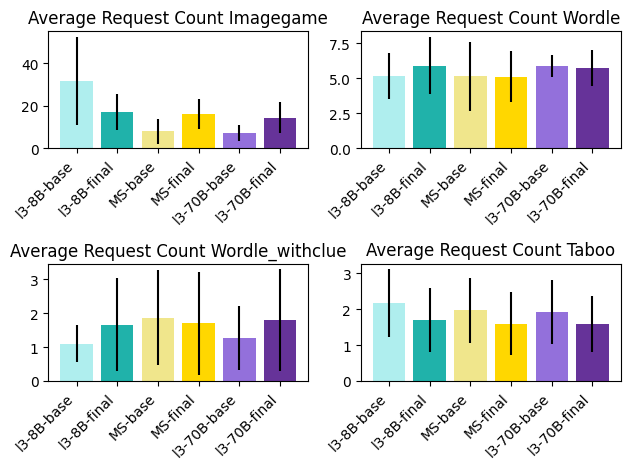

In [60]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(14, 14), dpi=200)
fig, axs = plt.subplots(2, 2)

indices = ["l3-8B-base", "l3-8B-final", "MS-base", "MS-final", "l3-70B-base", "l3-70B-final"]

for i, ax in enumerate(axs.flat):
    title = f"Average Request Count {games[i].capitalize()}"
    data = all_data[i]
    ax.set_title(title)
    ax.bar(indices, data, yerr = all_std[i], color=[ 'paleturquoise', 'lightseagreen', 'khaki', 'gold',"mediumpurple", "rebeccapurple", ])
    ax.set_xticks(indices)
    ax.set_xticklabels(indices, rotation=45, ha='right')
fig.tight_layout()
fig.savefig("../../plots/final_plots/average_requests.pdf", bbox_inches = "tight")
fig.show()